In [54]:
import os
import tensorflow as tf 
from tensorflow import keras 
#from tensorflow.keras import layers 
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [55]:
img_height = 256
img_width =256
batch_size=32


In [56]:
#import train Dataset

ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

ds_val=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 2156 files belonging to 6 classes.
Using 1725 files for training.
Found 2156 files belonging to 6 classes.
Using 431 files for validation.


In [57]:
class_names=ds_train.class_names
print(class_names)

['Karotte', 'Karotte_Trieb', 'Kartoffel', 'Kartoffel_Trieb', 'Zwiebel', 'Zwiebel_Trieb']


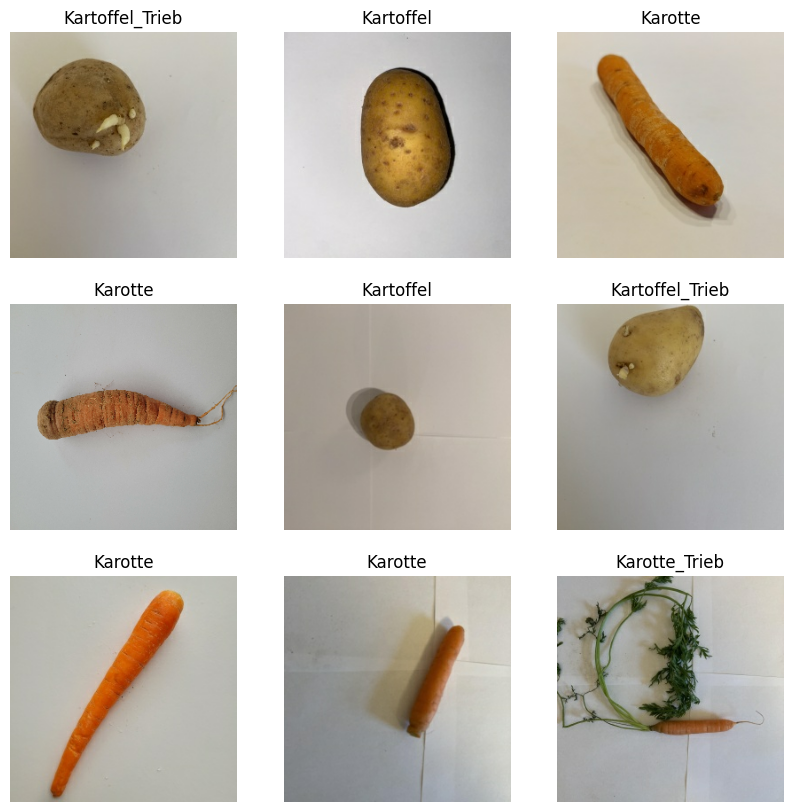

In [59]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [60]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [61]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(6)
])

In [62]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [47]:
epochs=6
history=model.fit(
  ds_train,
  validation_data=ds_val,
  epochs=6
)

Epoch 1/6


54/54 [==============================] - 45s 826ms/step - loss: 1.5486 - accuracy: 0.3867 - val_loss: 1.0916 - val_accuracy: 0.5731
Epoch 2/6
54/54 [==============================] - 46s 846ms/step - loss: 0.9635 - accuracy: 0.6354 - val_loss: 0.8731 - val_accuracy: 0.7146
Epoch 3/6
54/54 [==============================] - 46s 849ms/step - loss: 0.7420 - accuracy: 0.7188 - val_loss: 0.8027 - val_accuracy: 0.7100
Epoch 4/6
54/54 [==============================] - 47s 873ms/step - loss: 0.5259 - accuracy: 0.8151 - val_loss: 0.8326 - val_accuracy: 0.7378
Epoch 5/6
54/54 [==============================] - 46s 854ms/step - loss: 0.4145 - accuracy: 0.8591 - val_loss: 0.6002 - val_accuracy: 0.7703
Epoch 6/6
54/54 [==============================] - 47s 862ms/step - loss: 0.2950 - accuracy: 0.8916 - val_loss: 0.6408 - val_accuracy: 0.7889


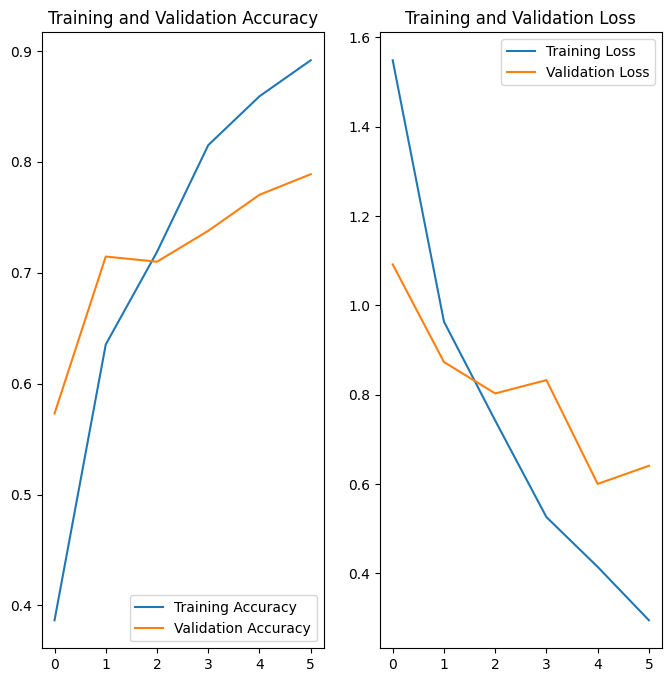

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
test=tf.keras.utils.load_img('D:/Dokumente/Master-Studium/Semester3/test.jpg', target_size=(img_height, img_width))
test_array = tf.keras.utils.img_to_array(test)
test_array = tf.expand_dims(test_array, 0)

In [52]:
predictions = model.predict(test_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Zwiebel with a 99.93 percent confidence.


In [53]:
model.save('D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN/first_model.keras')